In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
class RSIModel:
    def __init__(self, period=14):
        self.period = period
    
    def calculate_rsi(self, prices):
        """Calculate RSI for a series of prices"""
        # Calculate price changes
        delta = prices.diff()  # Computes the difference between consecutive price values
        
        # Separate gains and losses
        gain = (delta.where(delta > 0, 0)).rolling(window=self.period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=self.period).mean()
        
        # Calculate RS and RSI
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
        return rsi
    
    def get_stock_data(self, symbol, period="1y"):
        """Fetch stock data"""
        stock = yf.Ticker(symbol)
        data = stock.history(period=period)
        return data
    
    def analyze_stock(self, symbol):
        """Complete RSI analysis for a stock"""
        # Get stock data
        data = self.get_stock_data(symbol)
        
        # Calculate RSI
        data['RSI'] = self.calculate_rsi(data['Close'])
        
        # Generate signals
        data['Signal'] = self.generate_signals(data['RSI'])
        
        return data
    
    def generate_signals(self, rsi):
        """Generate buy/sell signals based on RSI"""
        signals = pd.Series(index=rsi.index, dtype='object')
        
        # Buy signals (RSI crosses above 30)
        signals.loc[(rsi.shift(1) < 30) & (rsi >= 30)] = 'BUY'
        
        # Sell signals (RSI crosses below 70)
        signals.loc[(rsi.shift(1) > 70) & (rsi <= 70)] = 'SELL'
        
        return signals
    
    def plot_analysis(self, symbol):
        """Plot price and RSI analysis"""
        data = self.analyze_stock(symbol)
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        
        # Plot price
        ax1.plot(data.index, data['Close'], label='Close Price', linewidth=2)
        
        # Plot buy/sell signals
        buy_signals = data[data['Signal'] == 'BUY']
        sell_signals = data[data['Signal'] == 'SELL']
        
        ax1.scatter(buy_signals.index, buy_signals['Close'], 
                   color='green', marker='^', s=100, label='Buy Signal')
        ax1.scatter(sell_signals.index, sell_signals['Close'], 
                   color='red', marker='v', s=100, label='Sell Signal')
        
        ax1.set_title(f'{symbol} Price with RSI Signals')
        ax1.set_ylabel('Price ($)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot RSI
        ax2.plot(data.index, data['RSI'], color='purple', linewidth=2)
        ax2.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought (70)')
        ax2.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold (30)')
        ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='Neutral (50)')
        
        ax2.set_title('RSI Oscillator')
        ax2.set_ylabel('RSI')
        ax2.set_xlabel('Date')
        ax2.set_ylim(0, 100)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return data

Date
2024-07-16 00:00:00-04:00    NaN
2024-07-17 00:00:00-04:00    NaN
2024-07-18 00:00:00-04:00    NaN
2024-07-19 00:00:00-04:00    NaN
2024-07-22 00:00:00-04:00    NaN
                            ... 
2025-07-10 00:00:00-04:00    NaN
2025-07-11 00:00:00-04:00    NaN
2025-07-14 00:00:00-04:00    NaN
2025-07-15 00:00:00-04:00    NaN
2025-07-16 00:00:00-04:00    NaN
Length: 251, dtype: object


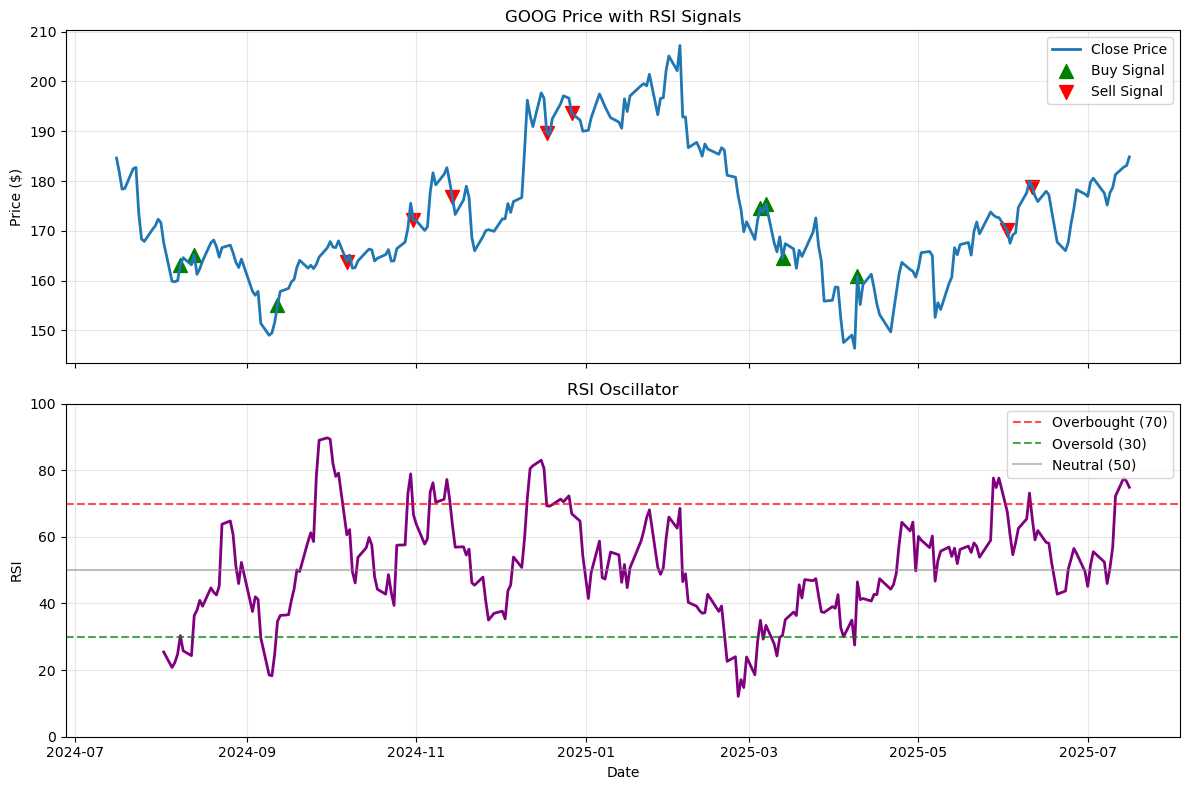

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,Signal
Date,,,,,,,,,
2024-07-16 00:00:00-04:00,188.057199,189.430596,184.235534,184.613724,12760100,0.0,0.0,NaN,NaN
2024-07-17 00:00:00-04:00,183.797622,184.344998,180.752245,181.747467,17376600,0.0,0.0,NaN,NaN
2024-07-18 00:00:00-04:00,182.663091,183.170664,177.358570,178.363739,17877200,0.0,0.0,NaN,NaN
2024-07-19 00:00:00-04:00,179.508211,181.100573,178.005431,178.532898,14485900,0.0,0.0,NaN,NaN
2024-07-22 00:00:00-04:00,181.478762,183.419442,181.030900,182.473984,16303900,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-07-10 00:00:00-04:00,176.669998,179.589996,175.740005,178.699997,24693700,0.0,0.0,56.908666,NaN
2025-07-11 00:00:00-04:00,177.910004,182.610001,177.541000,181.309998,23975700,0.0,0.0,72.247706,NaN
2025-07-14 00:00:00-04:00,182.070007,184.729996,180.710999,182.809998,20990400,0.0,0.0,77.722775,NaN


In [13]:
rsi = RSIModel()
rsi.plot_analysis('GOOG')



==================== GOOG ====================


C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '65.95331962995856' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Shares"] = shares_to_buy
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:127: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10222.805803723057' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Portfolio_Value"] = portfolio_value
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10989.813042023403' has dtype incompatible with in

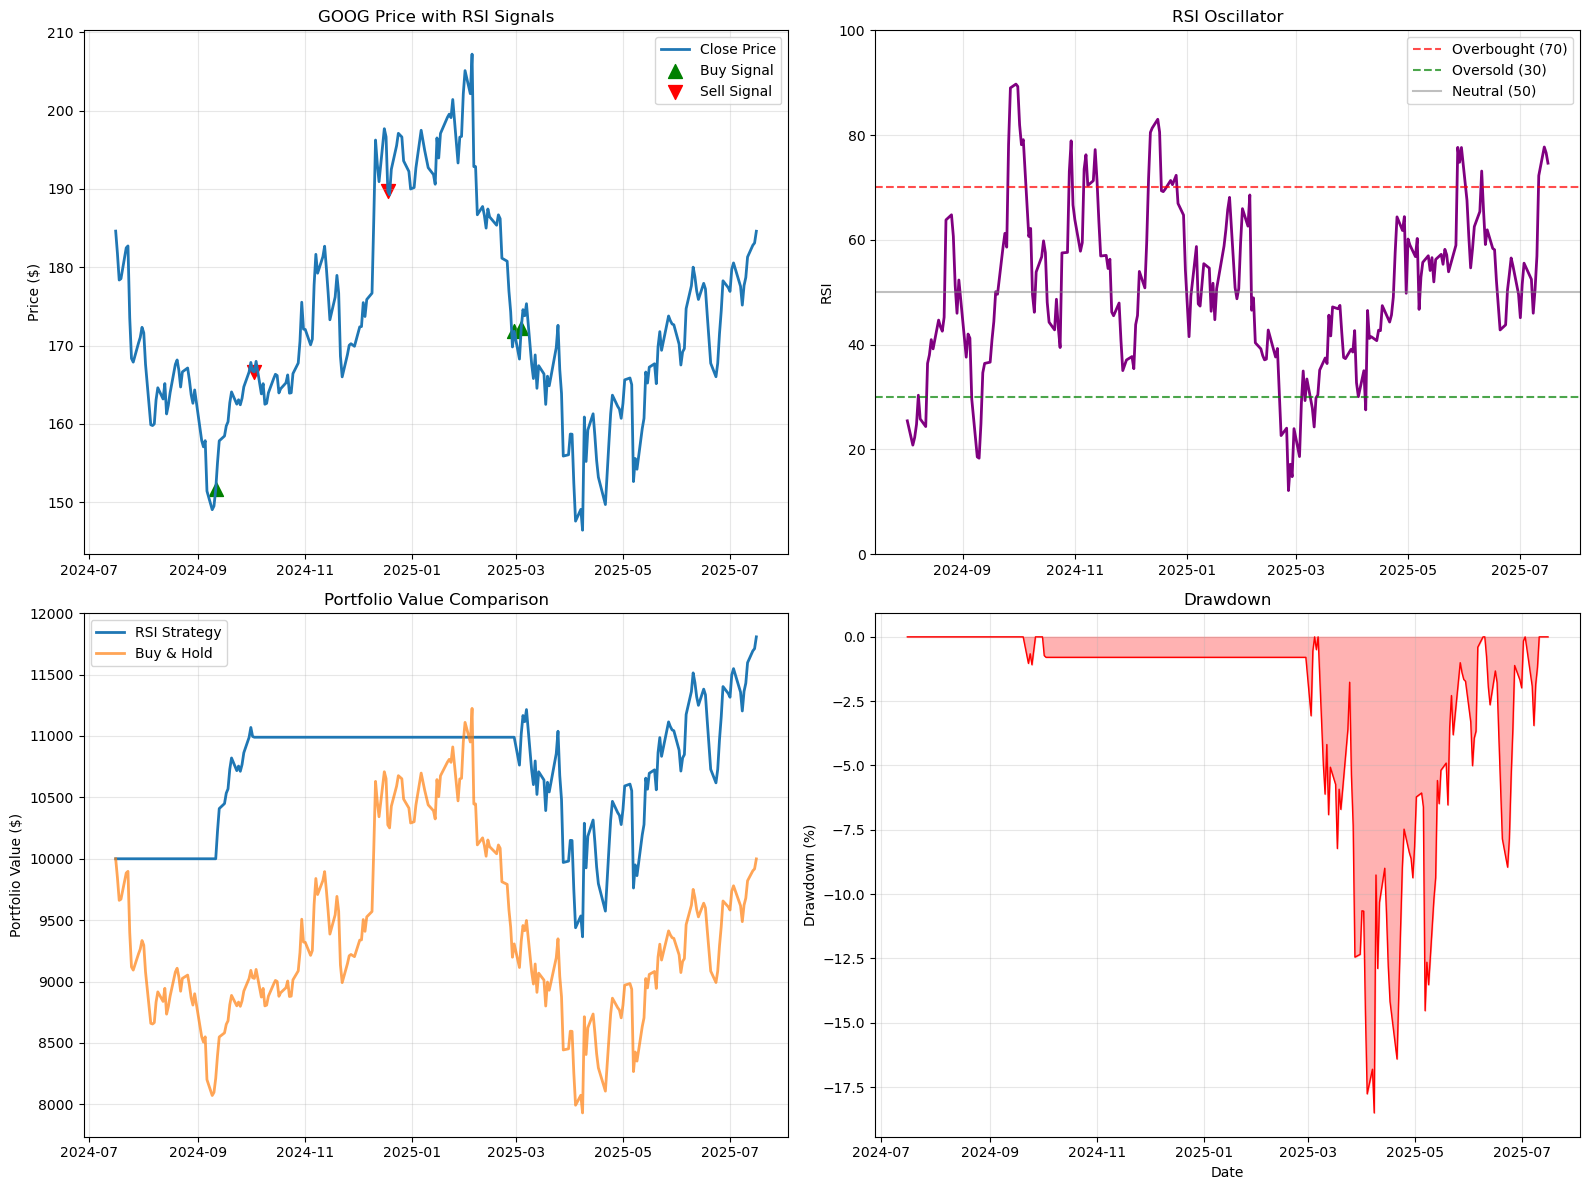

RSI STRATEGY BACKTEST RESULTS
Total Trades: 1
Winning Trades: 1
Losing Trades: 0
Win Rate: 100.00%
Total Return: 18.07%
Buy & Hold Return: -0.01%
Excess Return: 18.08%
Average Win: $989.81
Average Loss: $nan
Max Win: $989.81
Max Loss: $989.81
Average Return per Trade: 9.90%
Max Drawdown: -18.51%
Profit Factor: nan
Final Portfolio Value: $11807.25
[{'Entry_Date': Timestamp('2024-09-11 00:00:00-0400', tz='America/New_York'), 'Entry_Price': np.float64(151.6223907470703), 'Shares': np.float64(65.95331962995856), 'Type': 'BUY'}, {'Exit_Date': Timestamp('2024-10-03 00:00:00-0400', tz='America/New_York'), 'Exit_Price': np.float64(166.6301727294922), 'Trade_PnL': np.float64(989.813042023403), 'Return_Pct': np.float64(9.89813042023403), 'Type': 'SELL'}, {'Entry_Date': Timestamp('2025-02-28 00:00:00-0500', tz='America/New_York'), 'Entry_Price': np.float64(171.8175048828125), 'Shares': np.float64(63.96212684801217), 'Type': 'BUY'}]

INDIVIDUAL TRADES:
---------------------------------------------

C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.4812366384577' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Shares"] = shares_to_buy
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:127: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10124.981811028963' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Portfolio_Value"] = portfolio_value
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11063.314485848185' has dtype incompatible with int

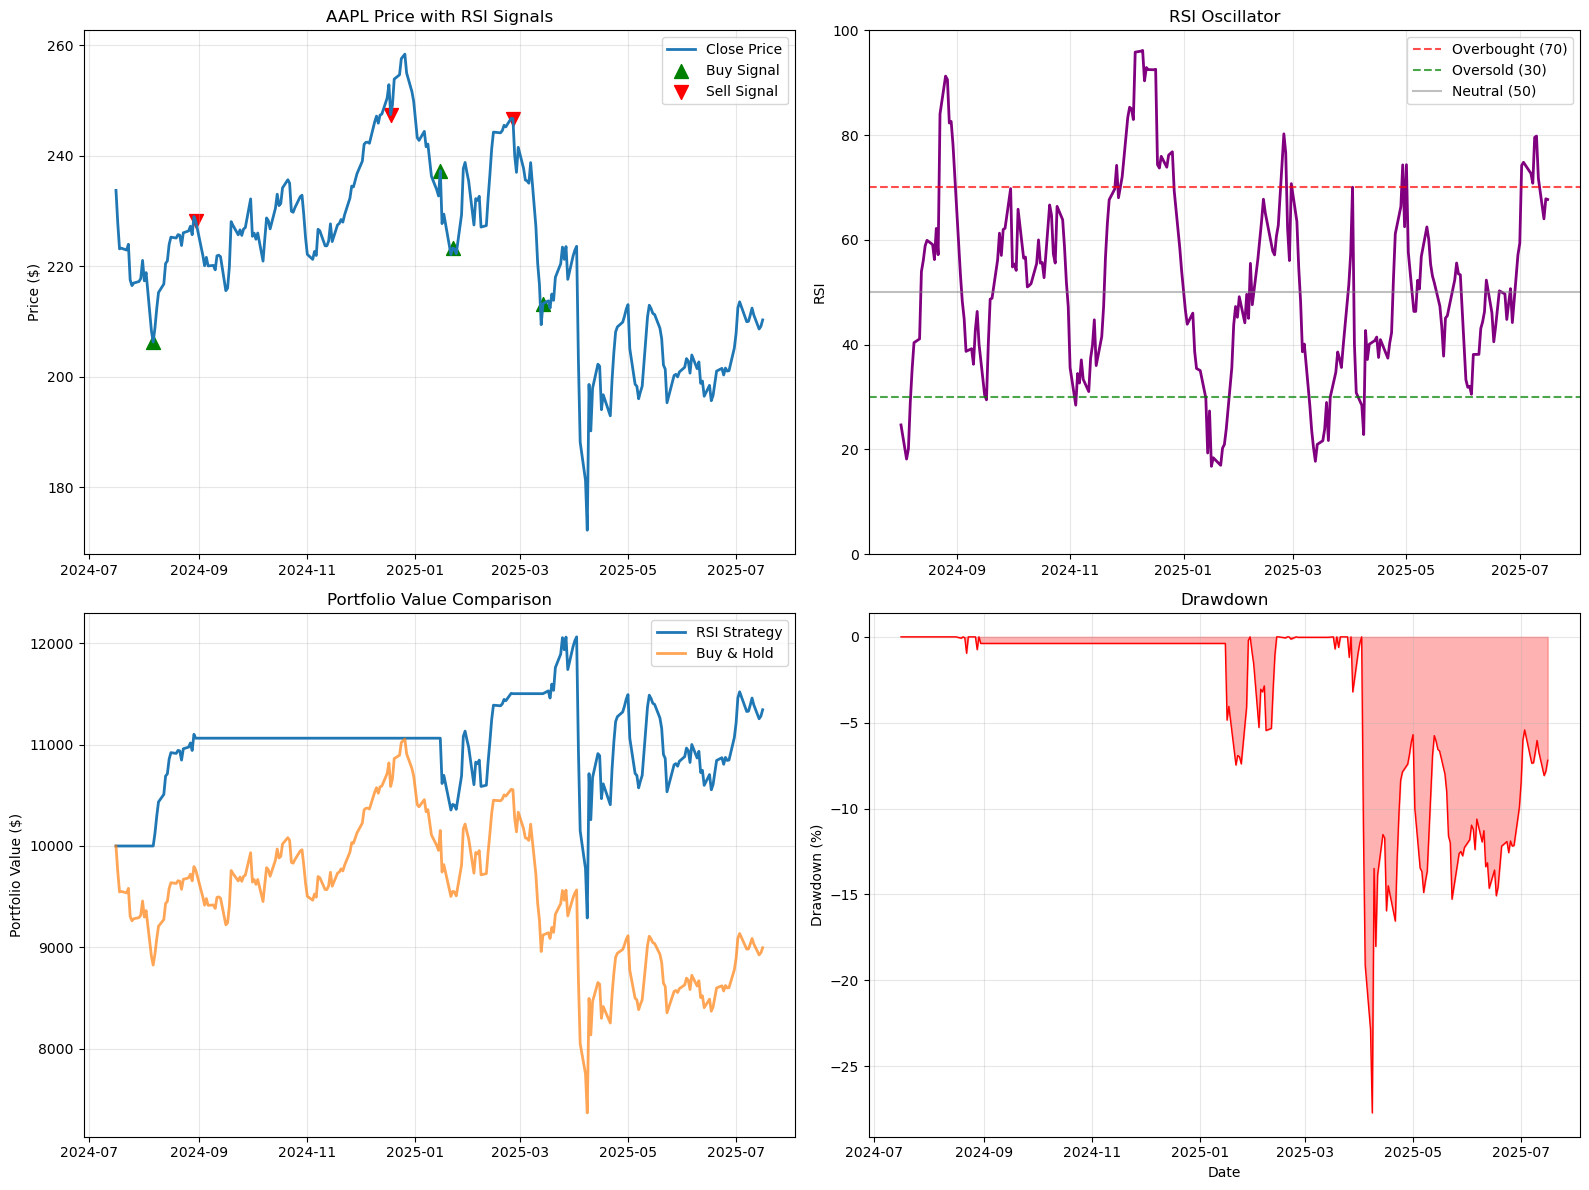

RSI STRATEGY BACKTEST RESULTS
Total Trades: 2
Winning Trades: 2
Losing Trades: 0
Win Rate: 100.00%
Total Return: 13.44%
Buy & Hold Return: -10.04%
Excess Return: 23.47%
Average Win: $751.22
Average Loss: $nan
Max Win: $1063.31
Max Loss: $439.13
Average Return per Trade: 7.30%
Max Drawdown: -27.73%
Profit Factor: nan
Final Portfolio Value: $11343.82
[{'Entry_Date': Timestamp('2024-08-06 00:00:00-0400', tz='America/New_York'), 'Entry_Price': np.float64(206.26536560058594), 'Shares': np.float64(48.4812366384577), 'Type': 'BUY'}, {'Exit_Date': Timestamp('2024-08-30 00:00:00-0400', tz='America/New_York'), 'Exit_Price': np.float64(228.19786071777344), 'Trade_PnL': np.float64(1063.3144858481853), 'Return_Pct': np.float64(10.633144858481852), 'Type': 'SELL'}, {'Entry_Date': Timestamp('2025-01-15 00:00:00-0500', tz='America/New_York'), 'Entry_Price': np.float64(237.2975616455078), 'Shares': np.float64(46.62211616980439), 'Type': 'BUY'}, {'Exit_Date': Timestamp('2025-02-25 00:00:00-0500', tz='Am

C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.2162597471756' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Shares"] = shares_to_buy
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:127: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9970.471242705731' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Portfolio_Value"] = portfolio_value
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11136.308474396277' has dtype incompatible with int6

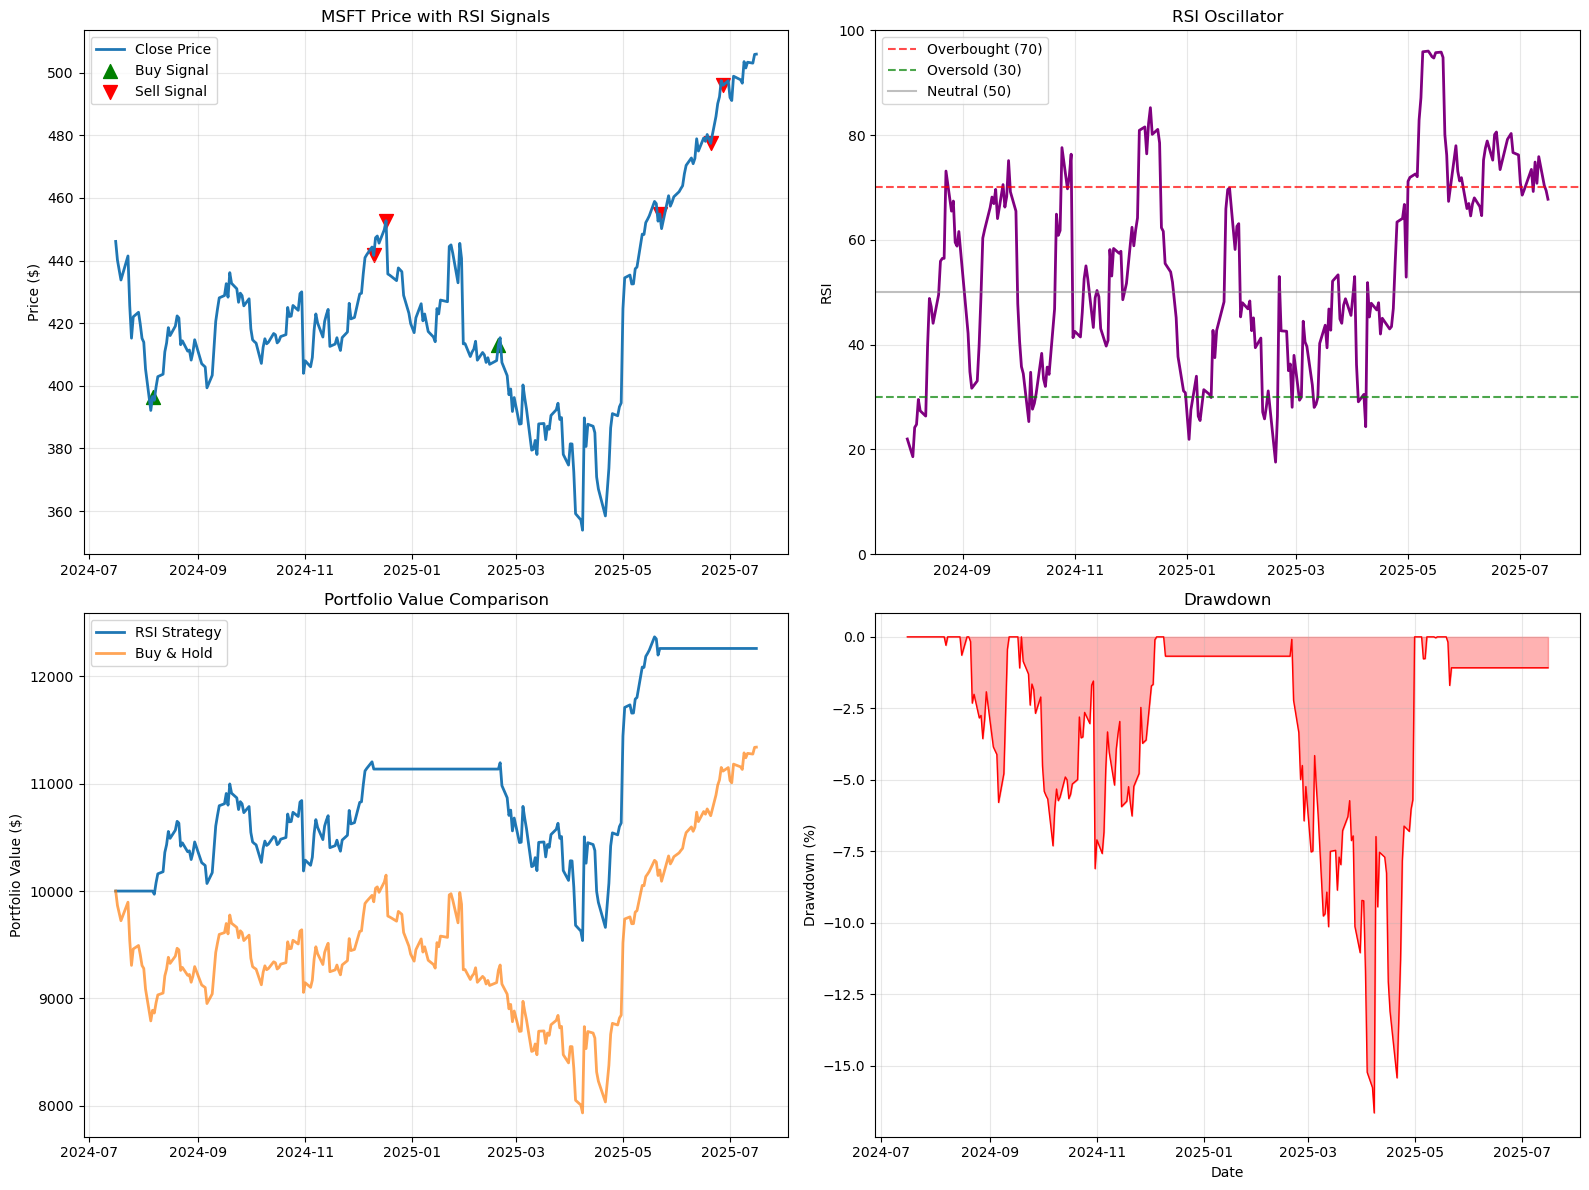

RSI STRATEGY BACKTEST RESULTS
Total Trades: 2
Winning Trades: 2
Losing Trades: 0
Win Rate: 100.00%
Total Return: 22.60%
Buy & Hold Return: 13.40%
Excess Return: 9.19%
Average Win: $1129.83
Average Loss: $nan
Max Win: $1136.31
Max Loss: $1123.34
Average Return per Trade: 10.73%
Max Drawdown: -16.65%
Profit Factor: nan
Final Portfolio Value: $12259.65
[{'Entry_Date': Timestamp('2024-08-06 00:00:00-0400', tz='America/New_York'), 'Entry_Price': np.float64(396.56951904296875), 'Shares': np.float64(25.2162597471756), 'Type': 'BUY'}, {'Exit_Date': Timestamp('2024-12-10 00:00:00-0500', tz='America/New_York'), 'Exit_Price': np.float64(441.6320495605469), 'Trade_PnL': np.float64(1136.3084743962772), 'Return_Pct': np.float64(11.363084743962773), 'Type': 'SELL'}, {'Entry_Date': Timestamp('2025-02-19 00:00:00-0500', tz='America/New_York'), 'Entry_Price': np.float64(413.1814270019531), 'Shares': np.float64(26.952587281576033), 'Type': 'BUY'}, {'Exit_Date': Timestamp('2025-05-22 00:00:00-0400', tz='A

C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.716798044031066' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Shares"] = shares_to_buy
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:127: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10577.397168343194' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], "Portfolio_Value"] = portfolio_value
C:\Users\SolomanShortland\AppData\Local\Temp\ipykernel_3180\2964016395.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10187.512923107059' has dtype incompatible with i

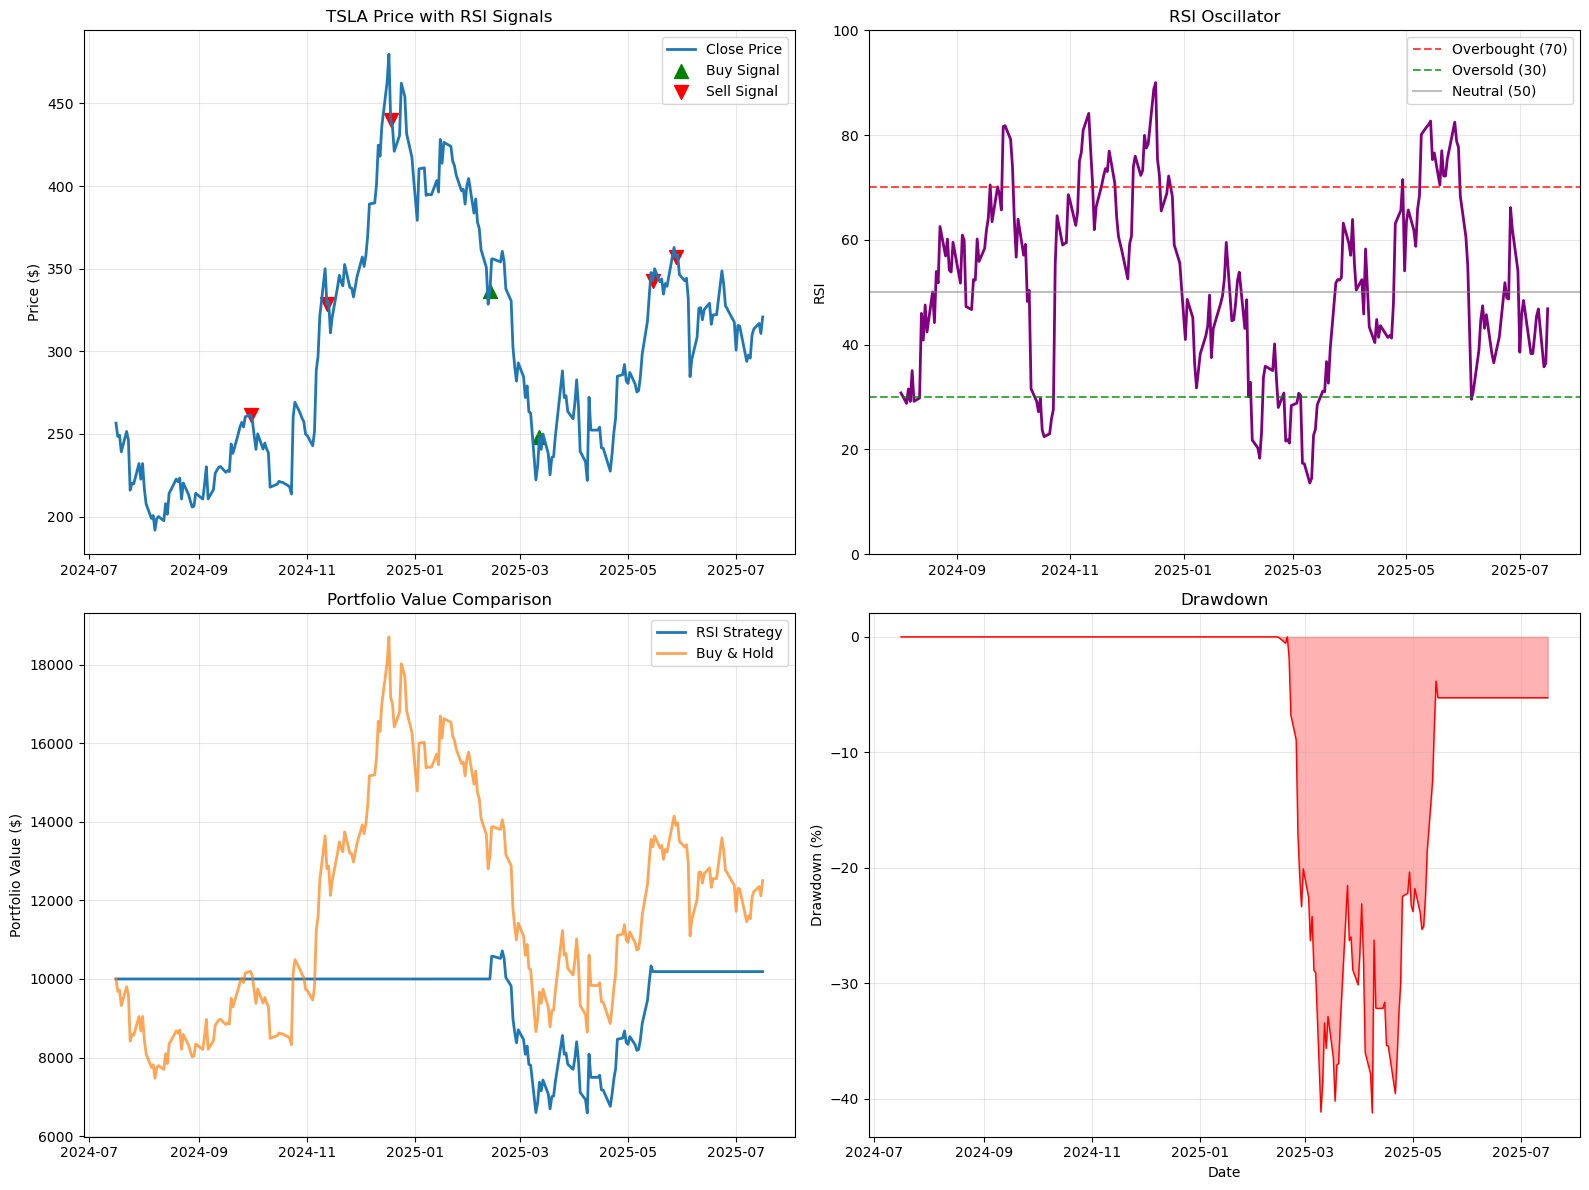

RSI STRATEGY BACKTEST RESULTS
Total Trades: 1
Winning Trades: 1
Losing Trades: 0
Win Rate: 100.00%
Total Return: 1.88%
Buy & Hold Return: 25.04%
Excess Return: -23.17%
Average Win: $187.51
Average Loss: $nan
Max Win: $187.51
Max Loss: $187.51
Average Return per Trade: 1.88%
Max Drawdown: -41.22%
Profit Factor: nan
Final Portfolio Value: $10187.51
[{'Entry_Date': Timestamp('2025-02-12 00:00:00-0500', tz='America/New_York'), 'Entry_Price': np.float64(336.510009765625), 'Shares': np.float64(29.716798044031066), 'Type': 'BUY'}, {'Exit_Date': Timestamp('2025-05-15 00:00:00-0400', tz='America/New_York'), 'Exit_Price': np.float64(342.82000732421875), 'Trade_PnL': np.float64(187.51292310705955), 'Return_Pct': np.float64(1.8751292310705956), 'Type': 'SELL'}]

INDIVIDUAL TRADES:
------------------------------------------------------------
Trade 1: 2025-02-12 → 2025-05-15 | $336.51 → $342.82 | PnL: $187.51 (1.88%)


In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


class RSIBacktestModel:
    def __init__(self, period=14, initial_capital=10000):
        self.period = period
        self.initial_capital = initial_capital

    def calculate_rsi(self, prices):
        """Calculate RSI for a series of prices"""
        # Calculate price changes
        delta = prices.diff()

        # Separate gains and losses
        gain = (delta.where(delta > 0, 0)).rolling(window=self.period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=self.period).mean()

        # Calculate RS and RSI
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        return rsi

    def get_stock_data(self, symbol, period="1y"):
        """Fetch stock data"""
        stock = yf.Ticker(symbol)
        data = stock.history(period=period)
        return data

    def generate_signals(self, rsi):
        """Generate buy/sell signals based on RSI"""
        signals = pd.Series(index=rsi.index, dtype="object")

        # Buy signals (RSI crosses above 30)
        signals.loc[(rsi.shift(1) < 20) & (rsi >= 20)] = "BUY"

        # Sell signals (RSI crosses below 70)
        signals.loc[(rsi.shift(1) > 80) & (rsi <= 80)] = "SELL"

        return signals

    def backtest_strategy(self, symbol, period="1y"):
        """Backtest the RSI strategy and calculate performance metrics"""
        # Get stock data
        data = self.get_stock_data(symbol, period)

        # Calculate RSI
        data["RSI"] = self.calculate_rsi(data["Close"])

        # Generate signals
        data["Signal"] = self.generate_signals(data["RSI"])

        # Initialize backtest variables
        data["Position"] = 0
        data["Cash"] = self.initial_capital
        data["Shares"] = 0
        data["Portfolio_Value"] = self.initial_capital

        # Track trades
        trades = []
        current_position = 0
        entry_price = 0
        entry_date = None

        # Simulate trading
        for i in range(1, len(data)):
            current_signal = data["Signal"].iloc[i]
            current_price = data["Close"].iloc[i]
            current_date = data.index[i]

            # Execute buy signal
            if current_signal == "BUY" and current_position == 0:
                shares_to_buy = data["Cash"].iloc[i - 1] / current_price
                data.loc[data.index[i], "Shares"] = shares_to_buy
                data.loc[data.index[i], "Cash"] = 0
                data.loc[data.index[i], "Position"] = 1
                current_position = 1
                entry_price = current_price
                entry_date = current_date

                trades.append(
                    {
                        "Entry_Date": entry_date,
                        "Entry_Price": entry_price,
                        "Shares": shares_to_buy,
                        "Type": "BUY",
                    }
                )

            # Execute sell signal
            elif current_signal == "SELL" and current_position == 1:
                shares_to_sell = data["Shares"].iloc[i - 1]
                cash_received = shares_to_sell * current_price
                data.loc[data.index[i], "Cash"] = cash_received
                data.loc[data.index[i], "Shares"] = 0
                data.loc[data.index[i], "Position"] = 0
                current_position = 0

                # Calculate trade profit/loss
                trade_pnl = (current_price - entry_price) * shares_to_sell

                trades.append(
                    {
                        "Exit_Date": current_date,
                        "Exit_Price": current_price,
                        "Trade_PnL": trade_pnl,
                        "Return_Pct": ((current_price - entry_price) / entry_price)
                        * 100,
                        "Type": "SELL",
                    }
                )

            # Carry forward position if no signal
            else:
                data.loc[data.index[i], "Cash"] = data["Cash"].iloc[i - 1]
                data.loc[data.index[i], "Shares"] = data["Shares"].iloc[i - 1]
                data.loc[data.index[i], "Position"] = current_position

            # Calculate portfolio value
            portfolio_value = data["Cash"].iloc[i] + (
                data["Shares"].iloc[i] * current_price
            )
            data.loc[data.index[i], "Portfolio_Value"] = portfolio_value

        # Calculate performance metrics
        performance_metrics = self.calculate_performance_metrics(data, trades)

        return data, trades, performance_metrics

    def calculate_performance_metrics(self, data, trades):
        """Calculate comprehensive performance metrics"""
        # Convert trades to DataFrame for easier analysis
        trades_df = pd.DataFrame(trades)

        # Basic metrics
        total_trades = len([t for t in trades if t["Type"] == "SELL"])
        winning_trades = len(
            [t for t in trades if t["Type"] == "SELL" and t["Trade_PnL"] > 0]
        )
        losing_trades = len(
            [t for t in trades if t["Type"] == "SELL" and t["Trade_PnL"] < 0]
        )

        win_rate = (winning_trades / total_trades * 100) if total_trades > 0 else 0

        # Calculate returns
        initial_value = self.initial_capital
        final_value = data["Portfolio_Value"].iloc[-1]
        total_return = ((final_value - initial_value) / initial_value) * 100

        # Buy and hold comparison
        buy_hold_return = (
            (data["Close"].iloc[-1] - data["Close"].iloc[0]) / data["Close"].iloc[0]
        ) * 100

        # Calculate trade statistics
        if len(trades_df) > 0:
            profitable_trades = trades_df[trades_df["Type"] == "SELL"]
            if len(profitable_trades) > 0:
                avg_win = profitable_trades[profitable_trades["Trade_PnL"] > 0][
                    "Trade_PnL"
                ].mean()
                avg_loss = profitable_trades[profitable_trades["Trade_PnL"] < 0][
                    "Trade_PnL"
                ].mean()
                max_win = profitable_trades["Trade_PnL"].max()
                max_loss = profitable_trades["Trade_PnL"].min()
                avg_return_pct = profitable_trades["Return_Pct"].mean()
            else:
                avg_win = avg_loss = max_win = max_loss = avg_return_pct = 0
        else:
            avg_win = avg_loss = max_win = max_loss = avg_return_pct = 0

        # Calculate drawdown
        data["Cumulative_Return"] = (
            data["Portfolio_Value"] - initial_value
        ) / initial_value
        data["Peak"] = data["Cumulative_Return"].expanding().max()
        data["Drawdown"] = (data["Cumulative_Return"] - data["Peak"]) * 100
        max_drawdown = data["Drawdown"].min()

        metrics = {
            "Total_Trades": total_trades,
            "Winning_Trades": winning_trades,
            "Losing_Trades": losing_trades,
            "Win_Rate_Pct": win_rate,
            "Total_Return_Pct": total_return,
            "Buy_Hold_Return_Pct": buy_hold_return,
            "Excess_Return_Pct": total_return - buy_hold_return,
            "Avg_Win": avg_win,
            "Avg_Loss": avg_loss,
            "Max_Win": max_win,
            "Max_Loss": max_loss,
            "Avg_Return_Pct": avg_return_pct,
            "Max_Drawdown_Pct": max_drawdown,
            "Final_Portfolio_Value": final_value,
            "Profit_Factor": abs(avg_win / avg_loss) if avg_loss != 0 else float("inf"),
        }

        return metrics

    def plot_backtest_results(self, symbol, period="1y"):
        """Plot comprehensive backtest results"""
        data, trades, metrics = self.backtest_strategy(symbol, period)

        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Price and signals
        ax1.plot(data.index, data["Close"], label="Close Price", linewidth=2)

        # Plot buy/sell signals
        buy_signals = data[data["Signal"] == "BUY"]
        sell_signals = data[data["Signal"] == "SELL"]

        ax1.scatter(
            buy_signals.index,
            buy_signals["Close"],
            color="green",
            marker="^",
            s=100,
            label="Buy Signal",
        )
        ax1.scatter(
            sell_signals.index,
            sell_signals["Close"],
            color="red",
            marker="v",
            s=100,
            label="Sell Signal",
        )

        ax1.set_title(f"{symbol} Price with RSI Signals")
        ax1.set_ylabel("Price ($)")
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: RSI
        ax2.plot(data.index, data["RSI"], color="purple", linewidth=2)
        ax2.axhline(y=70, color="r", linestyle="--", alpha=0.7, label="Overbought (70)")
        ax2.axhline(y=30, color="g", linestyle="--", alpha=0.7, label="Oversold (30)")
        ax2.axhline(y=50, color="gray", linestyle="-", alpha=0.5, label="Neutral (50)")

        ax2.set_title("RSI Oscillator")
        ax2.set_ylabel("RSI")
        ax2.set_ylim(0, 100)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 3: Portfolio value vs buy and hold
        buy_hold_value = self.initial_capital * (data["Close"] / data["Close"].iloc[0])
        ax3.plot(data.index, data["Portfolio_Value"], label="RSI Strategy", linewidth=2)
        ax3.plot(data.index, buy_hold_value, label="Buy & Hold", linewidth=2, alpha=0.7)
        ax3.set_title("Portfolio Value Comparison")
        ax3.set_ylabel("Portfolio Value ($)")
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 4: Drawdown
        ax4.fill_between(data.index, data["Drawdown"], 0, alpha=0.3, color="red")
        ax4.plot(data.index, data["Drawdown"], color="red", linewidth=1)
        ax4.set_title("Drawdown")
        ax4.set_ylabel("Drawdown (%)")
        ax4.set_xlabel("Date")
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print performance summary
        self.print_performance_summary(metrics, trades)

        return data, trades, metrics

    def print_performance_summary(self, metrics, trades):
        """Print detailed performance summary"""
        print("=" * 60)
        print("RSI STRATEGY BACKTEST RESULTS")
        print("=" * 60)
        print(f"Total Trades: {metrics['Total_Trades']}")
        print(f"Winning Trades: {metrics['Winning_Trades']}")
        print(f"Losing Trades: {metrics['Losing_Trades']}")
        print(f"Win Rate: {metrics['Win_Rate_Pct']:.2f}%")
        print(f"Total Return: {metrics['Total_Return_Pct']:.2f}%")
        print(f"Buy & Hold Return: {metrics['Buy_Hold_Return_Pct']:.2f}%")
        print(f"Excess Return: {metrics['Excess_Return_Pct']:.2f}%")
        print(f"Average Win: ${metrics['Avg_Win']:.2f}")
        print(f"Average Loss: ${metrics['Avg_Loss']:.2f}")
        print(f"Max Win: ${metrics['Max_Win']:.2f}")
        print(f"Max Loss: ${metrics['Max_Loss']:.2f}")
        print(f"Average Return per Trade: {metrics['Avg_Return_Pct']:.2f}%")
        print(f"Max Drawdown: {metrics['Max_Drawdown_Pct']:.2f}%")
        print(f"Profit Factor: {metrics['Profit_Factor']:.2f}")
        print(f"Final Portfolio Value: ${metrics['Final_Portfolio_Value']:.2f}")
        print("=" * 60)

        # Print individual trades
        print(trades)
        if trades:
            print("\nINDIVIDUAL TRADES:")
            print("-" * 60)
            for i in range(0, len(trades), 2):
                entry_trade = trades[i]
                # Check if the exit trade index exists
                if i + 1 < len(trades):
                    exit_trade = trades[i + 1]
                    print(
                        f"Trade {i // 2 + 1}: {entry_trade['Entry_Date'].strftime('%Y-%m-%d')} → "
                        f"{exit_trade['Exit_Date'].strftime('%Y-%m-%d')} | "
                        f"${entry_trade['Entry_Price']:.2f} → ${exit_trade['Exit_Price']:.2f} | "
                        f"PnL: ${exit_trade['Trade_PnL']:.2f} ({exit_trade['Return_Pct']:.2f}%)"
                    )



# Initialize the backtest model
backtest = RSIBacktestModel(period=14, initial_capital=10000)

# Run backtest on multiple stocks
symbols = ["GOOG", "AAPL", "MSFT", "TSLA"]

for symbol in symbols:
    print(f"\n{'=' * 20} {symbol} {'=' * 20}")
    data, trades, metrics = backtest.plot_backtest_results(symbol, period="1y")
